In [1]:
import os
import torch
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde, kurtosis

def load_weight_list_by_tag(weight_list_dir, tag = "server"):
    if tag is None:
        tag = "server"
    weight_list_dir = os.path.join(weight_list_dir,tag)
    weight_list = []
    for file in sorted(os.listdir(weight_list_dir)):
        if file.endswith('.pt'):
            weight_path = os.path.join(weight_list_dir, file)
            weight = torch.load(weight_path)
            weight_list.append(weight)
    return weight_list


def filter_weight(weight_list, unselect_list = None, all_select_list = None, any_select_list = None):
    # filtered_weight_list = weight_list
    filtered_weight_list = []
    for weights_dict in weight_list:
        # filtered_weights = {layer_key: weights for layer_key, weights in weights_dict.items() if 'bn' not in layer_key and 'weight' in layer_key}
        
        filtered_weights = {layer_key: weights.cpu() if torch.is_tensor(weights) else weights for layer_key, weights in weights_dict.items() if
                            (unselect_list is None or all(unselected_key not in layer_key for unselected_key in unselect_list)) and 
                            (all_select_list is None or all(selected_key in layer_key for selected_key in all_select_list)) and
                            (any_select_list is None or any(selected_key in layer_key for selected_key in any_select_list))}
        filtered_weight_list.append(filtered_weights)
    return filtered_weight_list

In [2]:

def plot_histogram_with_curve(parameters):
    plt.figure(figsize=(10, 5))

    # 这里使用十六进制表示颜色，分别代表黄色、绿色和蓝色系的三种颜色
    colors = [['#FFD700', '#FFA500', '#FF8C00'], ['#00FF00', '#32CD32', '#008000'], ['#00FFFF', '#1E90FF', '#0000FF']]

    # Convert odict_keys to list for compatibility
    # Iterate through all parameters
    i = 0
    for name, param in parameters.items():
        flat_params = param.flatten()
        # Plot histogram for current parameter
        # plt.hist(flat_params, bins=50, density=True, alpha=0.7, color=colors[i % len(colors)], label=name)
        color_idx = i // 3

        # Fit KDE curve to parameter
        kde_params = gaussian_kde(flat_params)
        x_vals = torch.linspace(flat_params.min(), flat_params.max(), 1000)
        plt.plot(x_vals.numpy(), kde_params(x_vals.numpy()), color=colors[color_idx][i % 3], linestyle='--', label=f'{name} (kurtosis: {kurtosis(flat_params.numpy(), fisher=False):.2f})')
        i+=1

    plt.title('Model Parameters Histograms with KDE')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
server_grad_list = load_weight_list_by_tag('grad_lists/202405072317/',"server")

In [ ]:
client_grad_dict = {f'c{i}':load_weight_list_by_tag('grad_lists/202405072317/',f'c{i}') for i in range(5)}


In [20]:
print(server_grad_list[0]['conv1.weight'])

tensor([[[[ 0.0596,  0.0746, -0.0849],
          [ 0.0294, -0.1309,  0.1111],
          [ 0.1305,  0.0551,  0.0807]],

         [[ 0.0621,  0.2048,  0.2005],
          [ 0.1216,  0.2323,  0.1672],
          [-0.1619, -0.0267, -0.1476]],

         [[-0.1172,  0.2519, -0.0027],
          [ 0.0330,  0.2400, -0.0057],
          [ 0.1083, -0.0316,  0.2636]]],


        [[[-0.1536, -0.1987,  0.0295],
          [ 0.2121, -0.0423, -0.0856],
          [ 0.1249, -0.1095,  0.0155]],

         [[ 0.0148,  0.0195, -0.0277],
          [ 0.2274, -0.1205, -0.0442],
          [ 0.2080, -0.0473, -0.1960]],

         [[ 0.2906,  0.2120,  0.1397],
          [ 0.2506, -0.0647, -0.0089],
          [-0.0607,  0.2506, -0.0328]]],


        [[[-0.0248, -0.1409, -0.0880],
          [ 0.2070,  0.0432,  0.0102],
          [ 0.1030,  0.0902, -0.0601]],

         [[ 0.2823,  0.1669, -0.1521],
          [ 0.1972,  0.0860, -0.1131],
          [ 0.3305,  0.0051, -0.0944]],

         [[-0.1441, -0.1872, -0.1361],
     

In [19]:
server_grad_list[0]['conv1.weight'].data

tensor([[[[ 0.0596,  0.0746, -0.0849],
          [ 0.0294, -0.1309,  0.1111],
          [ 0.1305,  0.0551,  0.0807]],

         [[ 0.0621,  0.2048,  0.2005],
          [ 0.1216,  0.2323,  0.1672],
          [-0.1619, -0.0267, -0.1476]],

         [[-0.1172,  0.2519, -0.0027],
          [ 0.0330,  0.2400, -0.0057],
          [ 0.1083, -0.0316,  0.2636]]],


        [[[-0.1536, -0.1987,  0.0295],
          [ 0.2121, -0.0423, -0.0856],
          [ 0.1249, -0.1095,  0.0155]],

         [[ 0.0148,  0.0195, -0.0277],
          [ 0.2274, -0.1205, -0.0442],
          [ 0.2080, -0.0473, -0.1960]],

         [[ 0.2906,  0.2120,  0.1397],
          [ 0.2506, -0.0647, -0.0089],
          [-0.0607,  0.2506, -0.0328]]],


        [[[-0.0248, -0.1409, -0.0880],
          [ 0.2070,  0.0432,  0.0102],
          [ 0.1030,  0.0902, -0.0601]],

         [[ 0.2823,  0.1669, -0.1521],
          [ 0.1972,  0.0860, -0.1131],
          [ 0.3305,  0.0051, -0.0944]],

         [[-0.1441, -0.1872, -0.1361],
     

In [15]:
tmp = torch.zeros_like(c1_grad_list[0]['conv1.weight']) 
for i in range(5):
    tmp += c1_grad_list[0]['conv1.weight']
print(tmp)

tensor([[[[ 5.7872e-02,  2.2566e-02,  1.8578e-02],
          [ 9.1021e-02,  5.0480e-03, -1.3511e-02],
          [ 9.8809e-02,  6.8960e-02,  6.6694e-02]],

         [[-2.2359e-03, -2.7920e-03, -3.5959e-03],
          [ 4.3548e-04, -4.1318e-02, -4.8836e-02],
          [-2.6706e-02, -1.3831e-02, -4.8623e-03]],

         [[ 3.7984e-02,  2.7100e-02,  6.0649e-03],
          [ 3.7860e-02, -2.1488e-02, -5.5117e-02],
          [-1.0484e-02, -2.2085e-02, -3.4577e-02]]],


        [[[ 1.4695e-01,  1.4198e-01,  8.3309e-02],
          [ 7.2883e-02,  6.9132e-02, -8.4552e-03],
          [ 1.2754e-01,  1.9836e-01,  1.4450e-01]],

         [[ 7.3518e-02,  6.5064e-02, -2.2240e-02],
          [-2.8477e-02, -3.5327e-02, -1.3283e-01],
          [-1.1388e-02,  5.7848e-02, -9.4408e-03]],

         [[ 4.0812e-02,  4.8540e-02, -4.5851e-02],
          [-5.4865e-02, -4.9752e-02, -1.3750e-01],
          [-2.2898e-02,  4.4108e-02, -2.5883e-02]]],


        [[[-3.1504e-02, -1.4849e-02, -7.9933e-02],
          [-9.5

In [ ]:
filtered_weight_list = filter_weight(weight_list, 
                                     unselect_list = ['bn'],
                                     all_select_list = ['weight', 'layer1'])
filtered_weight_list_layer2 = filter_weight(weight_list, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'layer2'])
filtered_weight_list_conv2 = filter_weight(weight_list, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'conv2'])
filtered_weight_list_layer1_0 = filter_weight(weight_list, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'layer1.0'])
filtered_weight_list_layer1_1 = filter_weight(weight_list, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'layer1.1'])

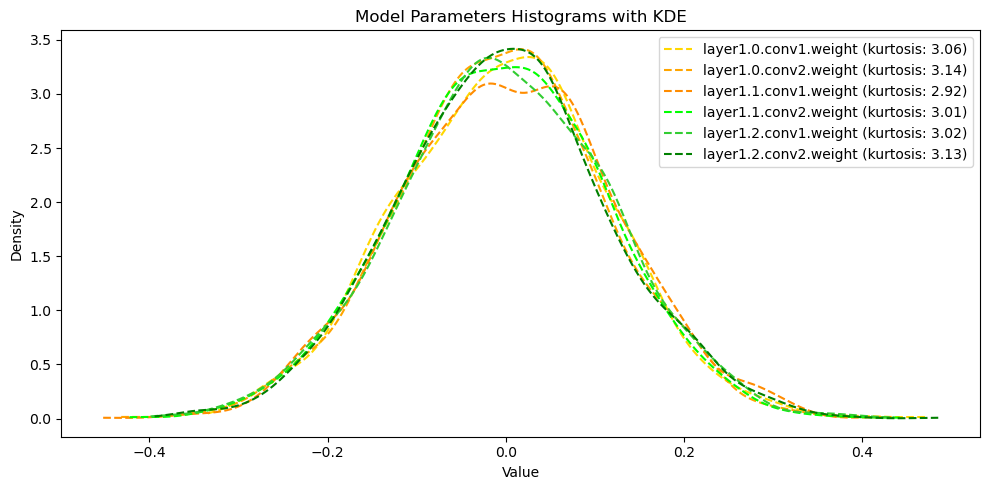

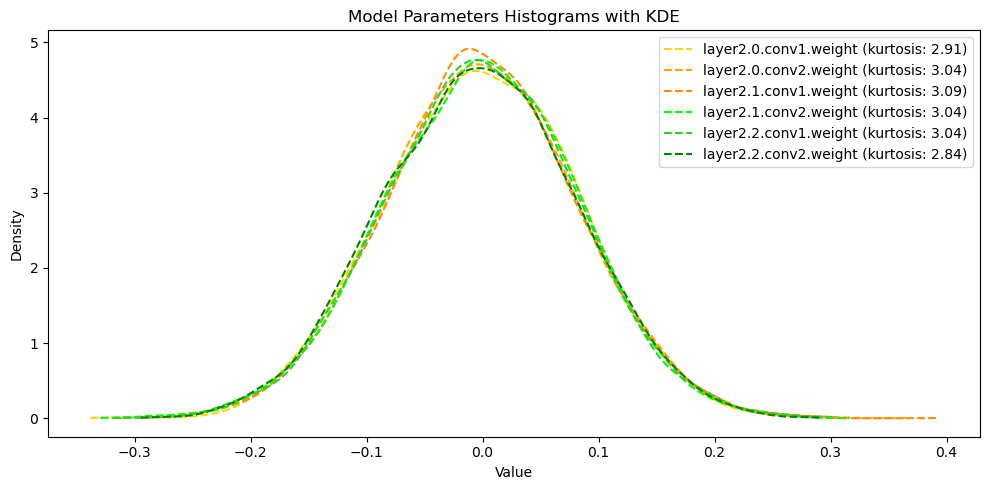

In [ ]:
plot_histogram_with_curve(filtered_weight_list[0])
plot_histogram_with_curve(filtered_weight_list_layer2[0])
plot_histogram_with_curve(filtered_weight_list_conv2[0])
plot_histogram_with_curve(filtered_weight_list_conv2[1])
plot_histogram_with_curve(filtered_weight_list_conv2[2])